### 사전 준비

In [2]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mbl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글/차트 마이너스 깨짐현상 해결/ seaborn 한글설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [4]:
# 머신러닝 패키지 추가
import statsmodels.api as sm # 안쓸껄?
import sklearn as sk

In [5]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

#### 훈련세트/테스트세트 분리

In [6]:
from sklearn.model_selection import  train_test_split

# 훈련세트/테스트세트 분리
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [7]:
# 훈련입력세트/ 테스트입력세트 2차원으로 변경
new_train_input = np.row_stack((train_input))
new_train_input.shape

(42, 1)

In [8]:
# 테스트입력세트
new_test_input = np.row_stack((test_input))
new_test_input.shape

(14, 1)

##### 모델 훈련

In [9]:
from sklearn.neighbors import  KNeighborsRegressor

Knr = KNeighborsRegressor( )

In [10]:
Knr.fit(X=new_train_input, y=train_target)

KNeighborsRegressor()

In [11]:
# 결정계수 확인
Knr.score(X=new_train_input, y=train_target)

0.9698823289099254

In [12]:
Knr.score(X=new_test_input, y=test_target)

0.992809406101064

In [13]:
# 길이가 50cm일때 무게는 얼마로 예측될까요?
Knr.predict([[50.0]])

array([1010.])

##### 어라?! 무게가 1500g이 넘는디?!
머신러닝 모델을 신뢰할 수 없는데??

러닝머신?? 머신러닝??

##### 훈련세트에 대한 산점도

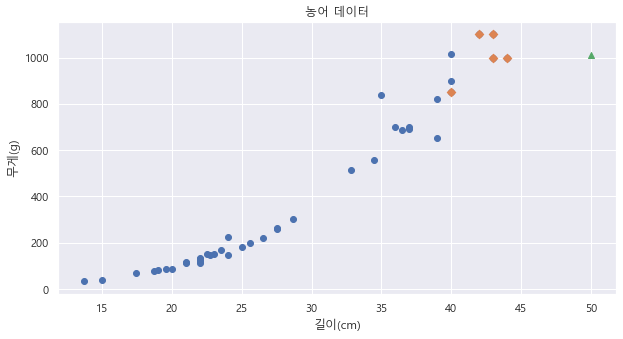

In [14]:
# 길이 50cm 농어에 대한 이웃값 3개
dist, inds = Knr.kneighbors([[50.0]])

plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input, y=train_target)
plt.scatter(x=new_train_input[inds], y=train_target[inds], marker='D')
plt.scatter(x=50, y=Knr.predict([[50.0]])[0], marker='^')

plt.title('농어 데이터')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show()

#### 이웃(3개) 평균

In [15]:
np.mean(train_target[inds])

1010.0

In [16]:
# 길이를 100cm 해도 무게는 
Knr.predict(X=[[100]])

array([1010.])

#### 선형회귀 Linear Regression

가장 대표적인 회귀 알고리즘

In [17]:
# KNN X --> LinearRegression 0
from sklearn.linear_model import LinearRegression

lr = LinearRegression( )

In [18]:
# 선형회귀 모델로 훈련
lr.fit(X=new_train_input, y=train_target)

LinearRegression()

In [19]:
lr.predict 

<bound method LinearModel.predict of LinearRegression()>

In [20]:
# 훈련데이터로 결정계수확인
lr.score(X=new_train_input, y=train_target)

0.9398463339976041

In [21]:
# 테스트데이터로 결정계수확인
lr.score(X=new_test_input, y=test_target)

0.824750312331356

In [22]:
# 길이 50cm 예측
lr.predict([[50.0]])
# 1033.3333(KNN) vs 1241.8386(Linear Reg)
# 460g vs 260g

array([1241.83860323])

In [23]:
# 1차 방정식의 값을 도출
print(lr.coef__, lr.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'coef__'

- coef_(계수) = 가중치(weight)
- intercept_(절편) = 잔차(error)

#### Linear Regression 산점도

AttributeError: 'LinearRegression' object has no attribute 'coef__'

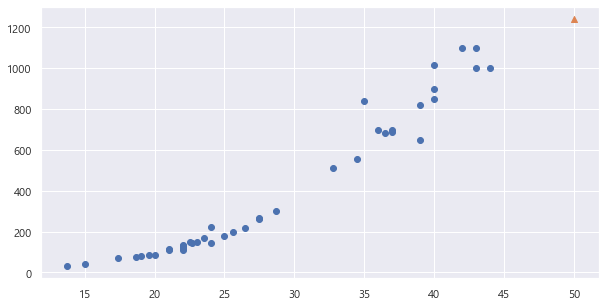

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input, y= train_target, )
plt.scatter(x=50, y=lr.predict([[50]]), marker='^')

# 1차방정식 선
plt.plot([15,50],[15*lr.coef__+lr.intercept_, 50*lr.coef__ + lr.intercept_],
            color='orange', linewidth='3.0')
plt.plot
plt.show()

##### 다항회귀

In [ ]:
train_poly = np.column_stack((new_train_input **2, new_train_input))
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [ ]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


##### 다항 선형회귀

In [ ]:
lr = LinearRegression()
lr.fit(X=train_poly, y=train_target)

LinearRegression()

In [ ]:
# 훈련데이터로 결정계수 확인
lr.score(X=train_poly, y=train_target)

0.9706807451768623

In [ ]:
# 테스트데이터로 결정계수 확인
lr.score(X=test_poly, y=test_target)

0.9775935108325122

In [ ]:
# 길이 50cm 농어의 무게 예측
# 길이의 제곱, 길이
lr.predict([[50.0**2,50.0]])
# 농어의 무게 예측 = 1573.98g

array([1573.98423528])

In [ ]:
print(lr.coef__, lr.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'coef__'

In [ ]:
lr.coef__[0]

AttributeError: 'LinearRegression' object has no attribute 'coef__'

##### 다항 회귀 산점도

In [24]:
point = np.arange(15,50)

plt.figure(figsize=(10,5))
plt,scatter(x=new_train_input, y=train_target)
# 15~49까지의 2차 방정식 그림
plt.plot(point, lr.coef__[0]*(point**2)+lr.coef__[1]*point+lr.intercept_,
            color='orange', linewidth='3.0')
plt,scatter(x=[50.0], y=lr.predict([[50.0**2, 50.0]]), marker='^', color='red')
plt.show()


NameError: name 'scatter' is not defined

<Figure size 720x360 with 0 Axes>

In [76]:
point

NameError: name 'point' is not defined